# Analysis of Short Answer Scores #3
## SA_pilots_b1 minus the person in story 12, Alex, Tara, Ally, Tony
## SA_b2_b3 Alex, Ally, Tony
## August 25, 2020
### What's special here is that I am putting together two rounds of scored short answers
### I'll be averaging the scores within respective rounds and then concatenating the averaged scores

In [19]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib.patches as mpatches
import random
%autosave 5

Autosaving every 5 seconds


# I. Importing scored sheets from different scorers

In [2]:
#getting filenames

# ROUND 1
# alex
directory_ar_1 = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/pilots_b1/alex'
filenames_ar_1 = glob.glob(directory_ar_1+ '/*.xlsx')

# tara
directory_tk = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/pilots_b1/tara'
filenames_tk = glob.glob(directory_tk+ '/*.xlsx')

# ally
directory_al_1 = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/pilots_b1/ally'
filenames_al_1 = glob.glob(directory_al_1 + '/*.xlsx')

# tony
directory_t_1 = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/pilots_b1/tony'
filenames_t_1 = glob.glob(directory_t_1 + '/*.xlsx')

# ROUND 2
# alex
directory_ar_2 = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/b2_b3/alex'
filenames_ar_2 = glob.glob(directory_ar_2+ '/*.xlsx')

# ally
directory_al_2 = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/b2_b3/ally'
filenames_al_2 = glob.glob(directory_al_2+ '/*.xlsx')

# tony
directory_t_2 = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/short_answers/scored/b2_b3/tony'
filenames_t_2 = glob.glob(directory_t_2+ '/*.xlsx')


# Importings files

# ROUND 1
#alex
rs_dfs_ar_1 = []

for filename in filenames_ar_1:
    rs_dfs_ar_1.append(pd.read_excel(filename))

#tara
rs_dfs_tk = []

for filename in filenames_tk:
    rs_dfs_tk.append(pd.read_excel(filename))
    
#ally
rs_dfs_al_1 = []

for filename in filenames_al_1:
    rs_dfs_al_1.append(pd.read_excel(filename))
    
# tony
rs_dfs_t_1 = []

for filename in filenames_t_1:
    rs_dfs_t_1.append(pd.read_excel(filename))
    
# ROUND 2
#alex
rs_dfs_ar_2 = []

for filename in filenames_ar_2:
    rs_dfs_ar_2.append(pd.read_excel(filename))
    
#ally
rs_dfs_al_2 = []

for filename in filenames_al_2:
    rs_dfs_al_2.append(pd.read_excel(filename))
    
# tony
rs_dfs_t_2 = []

for filename in filenames_t_2:
    rs_dfs_t_2.append(pd.read_excel(filename))
    
    
print('done!')

done!


In [3]:
# checking to make sure no weird formatting

# ROUND 1 
print('Round 1')
for i in range(0,16):
    print(rs_dfs_al_1[i]['story'].iloc[0])
    print(rs_dfs_tk[i]['story'].iloc[0])
    print(rs_dfs_ar_1[i]['story'].iloc[0])
    print(rs_dfs_t_1[i]['story'].iloc[0])
    print(rs_dfs_al_1[i].shape)
    print(rs_dfs_tk[i].shape)
    print(rs_dfs_ar_1[i].shape)
    print(rs_dfs_t_1[i].shape)
    
# ROUND 2
print('Round 2')
for i in range(0,16):
    print(rs_dfs_al_2[i]['story'].iloc[0])
    print(rs_dfs_ar_2[i]['story'].iloc[0])
    print(rs_dfs_t_2[i]['story'].iloc[0])
    print(rs_dfs_al_2[i].shape)
    print(rs_dfs_ar_2[i].shape)
    print(rs_dfs_t_2[i].shape)


Round 1
11
11
11
11
(3, 29)
(3, 21)
(3, 29)
(3, 21)
12
12
12
12
(5, 29)
(5, 21)
(5, 29)
(5, 21)
13
13
13
13
(2, 29)
(2, 21)
(2, 29)
(2, 21)
14
14
14
14
(5, 29)
(5, 21)
(5, 29)
(5, 21)
21
21
21
21
(3, 29)
(3, 21)
(3, 29)
(3, 21)
22
22
22
22
(6, 29)
(6, 21)
(6, 29)
(6, 21)
23
23
23
23
(7, 29)
(7, 21)
(7, 29)
(7, 21)
24
24
24
24
(4, 29)
(4, 21)
(4, 29)
(4, 21)
31
31
31
31
(2, 29)
(2, 21)
(2, 29)
(2, 21)
32
32
32
32
(4, 29)
(4, 21)
(4, 29)
(4, 21)
33
33
33
33
(6, 29)
(6, 21)
(6, 29)
(6, 21)
34
34
34
34
(4, 29)
(4, 21)
(4, 29)
(4, 21)
41
41
41
41
(1, 29)
(1, 21)
(1, 29)
(1, 21)
42
42
42
42
(6, 29)
(6, 21)
(6, 29)
(6, 21)
43
43
43
43
(5, 29)
(5, 21)
(5, 29)
(5, 21)
44
44
44
44
(4, 29)
(4, 22)
(4, 29)
(4, 21)
Round 2
11
11
11
(7, 21)
(7, 21)
(7, 21)
12
12
12
(4, 21)
(4, 21)
(4, 21)
13
13
13
(3, 21)
(3, 21)
(3, 21)
14
14
14
(4, 21)
(4, 21)
(4, 21)
21
21
21
(5, 21)
(5, 21)
(5, 21)
22
22
22
(5, 21)
(5, 21)
(5, 21)
23
23
23
(6, 21)
(6, 21)
(6, 21)
24
24
24
(6, 21)
(6, 21)
(6, 21)
31
31
31
(6, 21)

In [4]:
rs_dfs_t_1[]

SyntaxError: invalid syntax (<ipython-input-4-c89a22a64c4f>, line 1)

# II. Averaging Score of each entry across scorers

In [5]:
avg_ss = {}
q = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8']

for i in range(0, 16):
    # Getting the shape of Round 1 score sheets
    x1, y1 = rs_dfs_ar_1[i].shape
    
    # Getting the shape of Round 2 score sheets
    x2, y2 = rs_dfs_ar_2[i].shape
    
    # Getting the story 
    this_story = rs_dfs_ar_1[i]['story'].iloc[0]
    
    # Making and padding the story column for new df
    story_col = np.array([this_story])
    story_col = np.pad(story_col, (0, ((x1 + x2)-1)), mode = 'constant')
    
    #making the prolific id column
    id_col_1 = rs_dfs_ar_1[i]['prolific_id']
    id_col_2 = rs_dfs_ar_2[i]['prolific_id']
    id_col = pd.concat([id_col_1, id_col_2])
    
    #making the perspective column
    persp_col_1 = rs_dfs_ar_1[i]['persp']
    persp_col_2 = rs_dfs_ar_2[i]['persp']
    persp_col = pd.concat([persp_col_1, persp_col_2])
    
    #making the priming-type column
    p_col_1 = rs_dfs_ar_1[i]['p_type']
    p_col_2 = rs_dfs_ar_2[i]['p_type']
    p_col = pd.concat([p_col_1, p_col_2])
    
    #instantiate df
    data = {'story': story_col,'id': id_col,'perspective': persp_col, 'priming': p_col}
    this_df = pd.DataFrame(data)
    ##Averaging scores across scorers
    for this_q in q:
        # Round 1
        #get each scorers scores for a question
        x = rs_dfs_ar_1[i][this_q]
        y = rs_dfs_tk[i][this_q]
        z = rs_dfs_al_1[i][this_q]
        #put them all in an array
        tog1 = np.array((x, y, z))
        #avg across the rows
        avg1 = np.average(tog1, axis=0)
        
        # Round 2
        #get each scorers scores for a question
        x2 = rs_dfs_ar_2[i][this_q]
        y2 = rs_dfs_al_2[i][this_q]
        #put them all in an array
        tog2 = np.array((x2, y2))
        #avg across the rows
        avg2 = np.average(tog2, axis=0)
        
        # Concatenate Round 1 and Round 2
        avg = np.concatenate((avg1, avg2))
        
        #add the avg'd array to this_df
        this_df[this_q] = avg
    #reset the index
    this_df = this_df.reset_index()
    #adding this_df to outstanding dictionary
    avg_ss[this_story] = this_df
    
    

### Check if there are any avg scores over 3 indicating a scoring typo

In [6]:
for key in avg_ss:
    for this_q in q:
        if (avg_ss[key][this_q] > 3).any():
            print(key, this_q)

# III. Naming Excluded Participants (haven't actually verified that this works)
###  Exclustion criterion: participant scores 0 for all the answers across all scorers
## A. Finding participants to exclude

In [7]:
for key in avg_ss.keys():
    print('key', key)
    for i in range(0, avg_ss[key].shape[0]):
        count = 0 
        if avg_ss[key]['q1'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q2'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q3'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q4'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q5'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q6'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q7'].iloc[i] == 0:
            count += 1
        else:
            pass
        if avg_ss[key]['q8'].iloc[i] == 0:
            count += 1
        else:
            pass
        if count == 8:
            print(avg_ss[key]['id'].iloc[i])
            

key 11
key 12
key 13
key 14
key 21
key 22
key 23
key 24
5ed1443918f6bd07449d88a5
key 31
key 32
59a817a969b7e70001fe5d38
key 33
key 34
key 41
key 42
key 43
key 44


## B. Manually excluding participants

In [8]:
avg_ss[24].drop(avg_ss[24].loc[avg_ss[24]['id']=='5ed1443918f6bd07449d88a5'].index, inplace=True)
avg_ss[24].reset_index()

avg_ss[32].drop(avg_ss[32].loc[avg_ss[32]['id']=='59a817a969b7e70001fe5d38'].index, inplace=True)
avg_ss[32].reset_index()

,level_0,index,story,id,perspective,priming,q1,q2,q3,q4,q5,q6,q7,q8
0,0,0,32,5e14da8da29f4b000ccc9b1d,2,0,0.0,2.0,0.0,2.000000,2.333333,3.0,0.0,3.0
1,1,1,0,5d4ad488dfd8230018fd0b45,2,1,3.0,0.0,0.0,2.000000,0.333333,0.0,0.0,3.0
2,2,2,0,5cb8d06a75c0e10001540418,2,0,0.0,3.0,2.0,0.000000,2.333333,3.0,3.0,3.0
3,3,3,0,5ecc7ff92fdab685b971ab4b,30,2,3.0,0.0,2.0,0.666667,1.333333,3.0,2.0,3.0
4,4,0,0,5c730ca1f674750001df8d09,2,0,0.0,3.0,0.0,2.000000,0.500000,0.0,0.0,0.0
5,5,1,0,5ae5e66d3ab2fb0001ef2f3c,2,1,3.0,3.0,3.0,0.000000,1.500000,3.0,3.0,3.0
6,7,3,0,5ed478fa7d20a043b7c3be83,2,1,0.0,3.0,0.0,3.000000,2.500000,3.0,0.0,3.0


# IV. Averaging scores across similarly primed participants
## A. Separate priming groups

In [9]:
ss_0 = {}
ss_1 = {}
ss_2 = {}

for key in avg_ss.keys():
    df_0 = pd.DataFrame(columns=['story','id','perspective','priming','q1','q2','q3','q4','q5','q6','q7','q8'])
    df_1 = pd.DataFrame(columns=['story','id','perspective','priming','q1','q2','q3','q4','q5','q6','q7','q8'])
    df_2 = pd.DataFrame(columns=['story','id','perspective','priming','q1','q2','q3','q4','q5','q6','q7','q8'])
    for i in range(0, avg_ss[key].shape[0]):
        this_row = {'story': avg_ss[key]['story'].iloc[0],
                   'id': avg_ss[key]['id'].iloc[i],
                   'perspective': avg_ss[key]['perspective'].iloc[i],
                   'priming': avg_ss[key]['priming'].iloc[i],
                   'q1': avg_ss[key]['q1'].iloc[i],
                   'q2': avg_ss[key]['q2'].iloc[i],
                   'q3': avg_ss[key]['q3'].iloc[i],
                   'q4': avg_ss[key]['q4'].iloc[i],
                   'q5': avg_ss[key]['q5'].iloc[i],
                   'q6': avg_ss[key]['q6'].iloc[i],
                   'q7': avg_ss[key]['q7'].iloc[i],
                   'q8': avg_ss[key]['q8'].iloc[i]}
        if avg_ss[key]['priming'].iloc[i] == 0:
            df_0 = df_0.append(this_row, ignore_index = True)
        elif avg_ss[key]['priming'].iloc[i] == 1:
            df_1 = df_1.append(this_row, ignore_index = True)
        else:
            df_2 = df_2.append(this_row, ignore_index = True)
    ss_0[key] = df_0
    ss_1[key] = df_1
    ss_2[key] = df_2

## B. Average across priming groups and across location and social questions
### - output: dict = {avg loc score, avg soc score}

In [10]:
avg_ss_0 = {}
avg_ss_1 = {}
avg_ss_2 = {}

sss = [ss_0, ss_1, ss_2]
avgs = [avg_ss_0, avg_ss_1, avg_ss_2]

for i in range(0,3):
    print('this is: ', i)
    for key in avg_ss.keys():
        #average column-wise, across all participants for each question
        av_col = sss[i][key].mean(axis = 0)
        #collecting location and social questions
        loc_qs = np.array([av_col['q1'], av_col['q2'], av_col['q3'], av_col['q4']])
        soc_qs = np.array([av_col['q5'], av_col['q6'], av_col['q7'], av_col['q8']])
        #averaging location and social questions
        avg_loc = np.nanmean(loc_qs)
        avg_soc = np.nanmean(soc_qs)              
        avgs[i][key] = np.array([avg_loc, avg_soc])
        

this is:  0
this is:  1
this is:  2


/Users/alexreblando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning:

Mean of empty slice

/Users/alexreblando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

Mean of empty slice



## C. Bar graph plotting for each priming type and story the average location and social question scores
### - green = avg location question score; blue = avg social question score

[1.77777778 2.01041667 2.11111111]
[1.125      1.625      2.19444444]


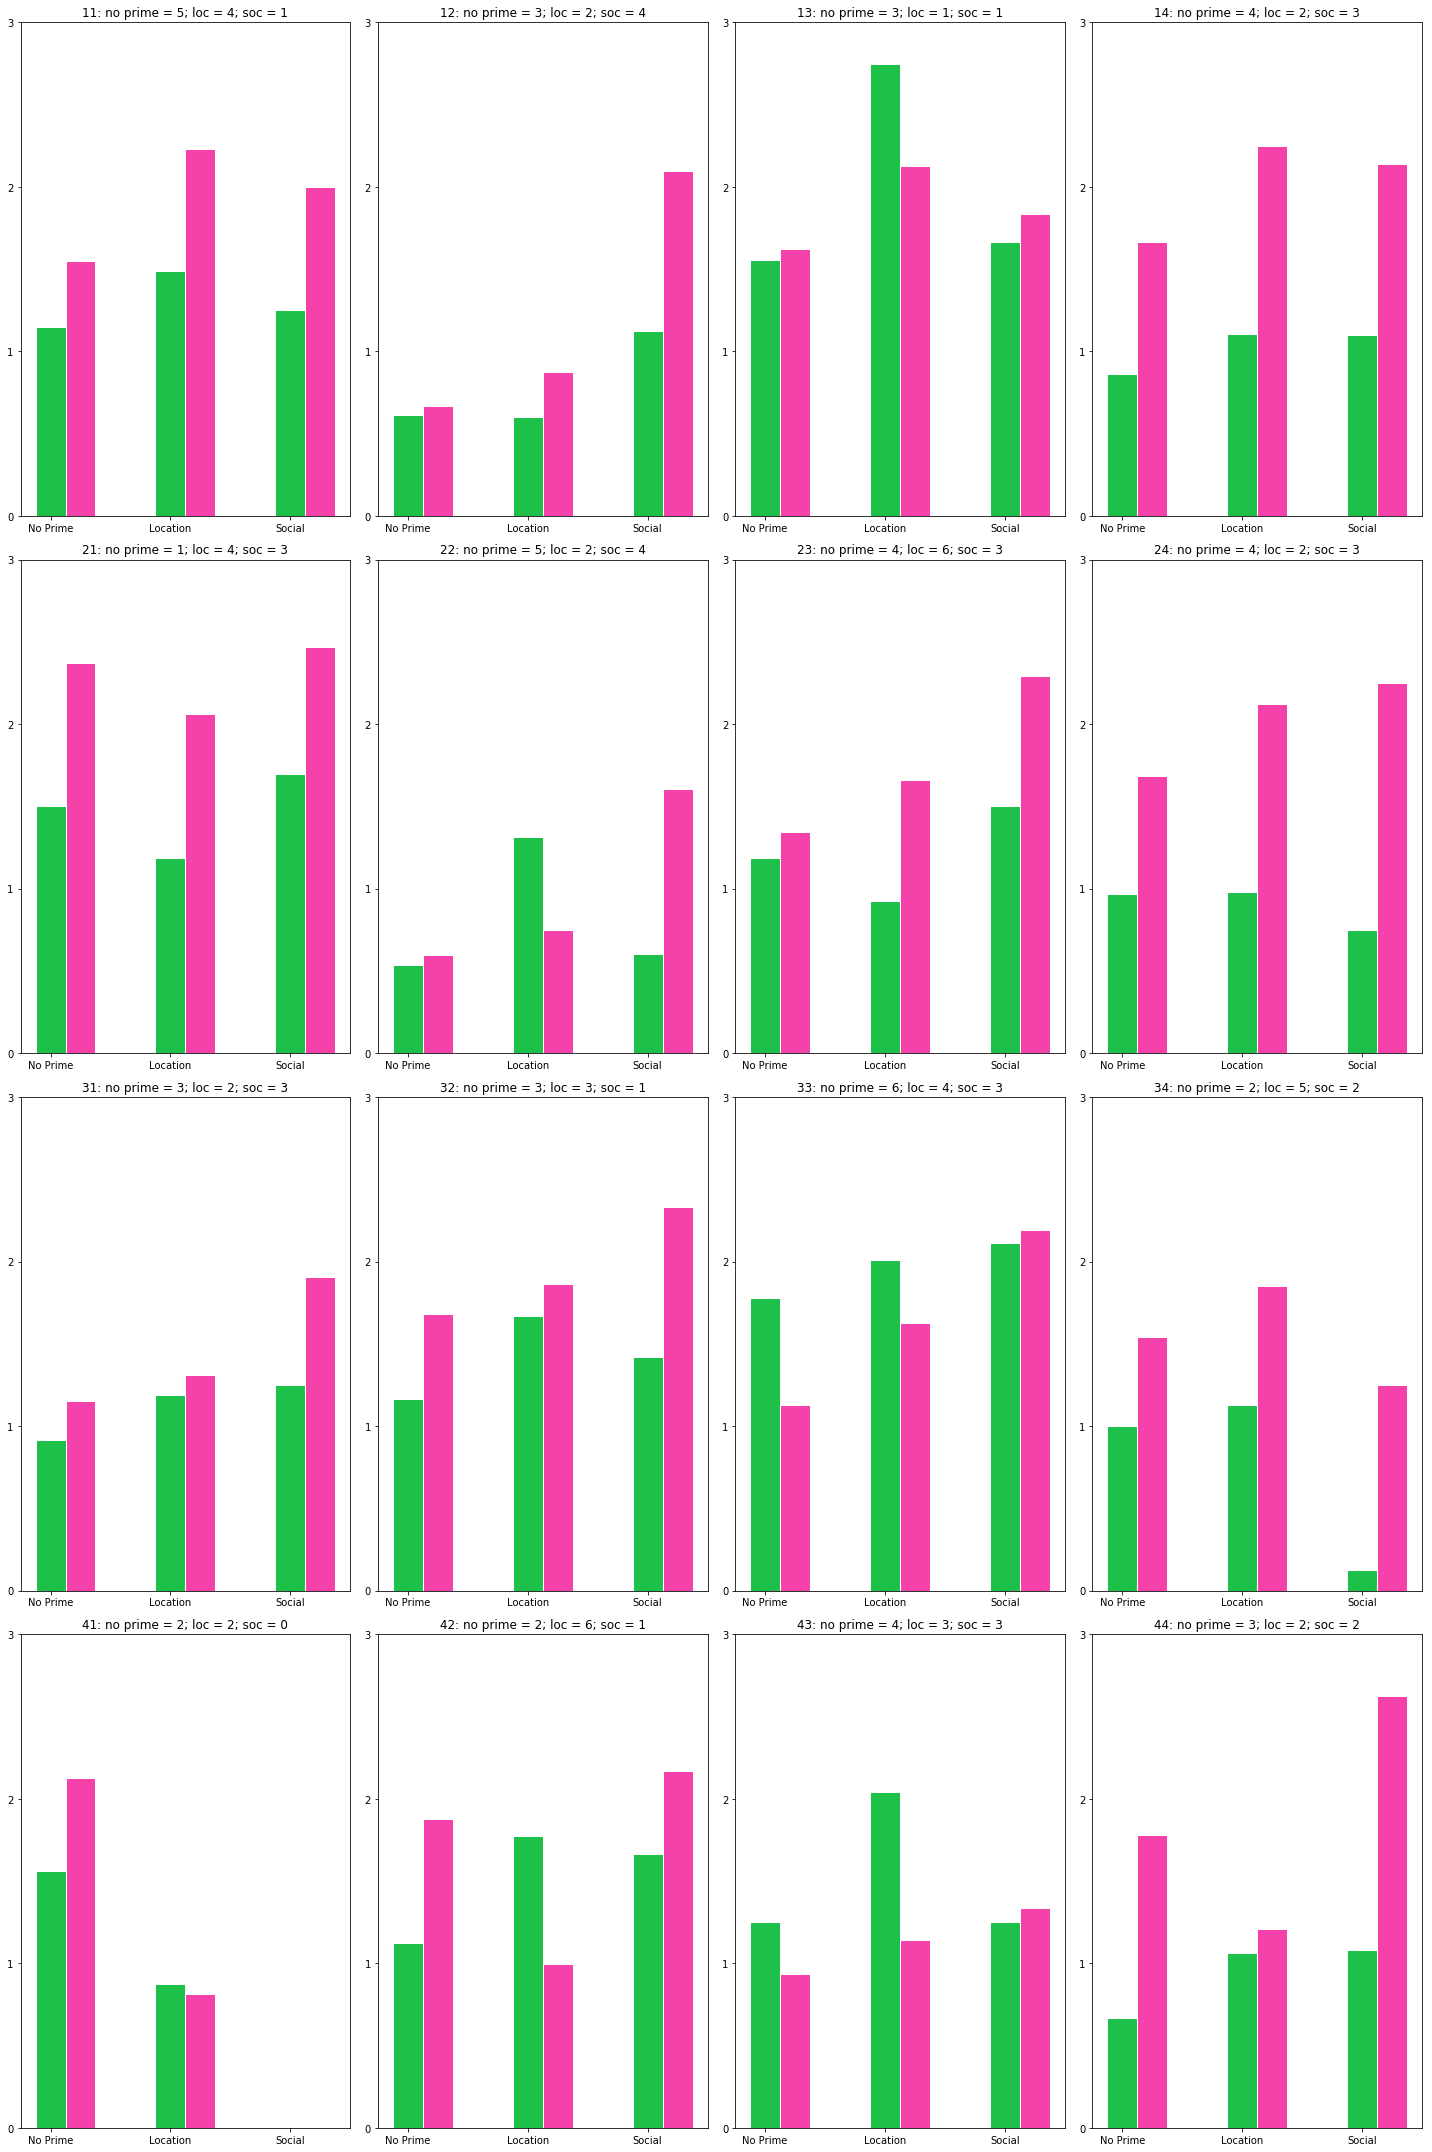

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 30))
# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[0, 1, 2, 3], xticklabels=['No Prime', 'Location', 'Social'],
        yticks=[0, 1, 2, 3])
# set width of bar
barWidth = 0.25
i = 0
j = 0
for key in avg_ss.keys():
    # set height of bar
    loc = np.array([avg_ss_0[key][0], avg_ss_1[key][0], avg_ss_2[key][0]])
    soc = np.array([avg_ss_0[key][1], avg_ss_1[key][1], avg_ss_2[key][1]])
    
    if key == 33:
        print(loc)
        print(soc)
    
    #nan to num
    loc = np.nan_to_num(loc)
    soc = np.nan_to_num(soc)
    
    #get the number of participants in each group
    num_0 = str(len(ss_0[key]))
    num_1 = str(len(ss_1[key]))
    num_2 = str(len(ss_2[key]))
    title = str(key) + ": no prime = " + num_0 + "; loc = " + num_1 + "; soc = " + num_2
    
    # Set position of bar on X axis
    r1 = np.arange(len(loc))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    axes[j, i].bar(r1, loc, color='#1dc149', width=barWidth, edgecolor='white')
    axes[j, i].bar(r2, soc, color= '#f542aa', width=barWidth, edgecolor='white')
    
    #set title
    
    axes[j, i].set_title(title)
    
    # Add xticks on the middle of the group bars
    #axes[i, j].set_xlabel(key, fontweight='bold')
    axes[j, i].set_yticks([0, 1, 2, 3])
    
    
    #changing i, j for next graph placement
    if i == 3:
        i = 0
        j += 1
    else:
        i += 1
    figure.tight_layout()


## D. Average location score and social score across all stories

In [12]:
l_scores_0

NameError: name 'l_scores_0' is not defined

In [ ]:
l_scores_0 = []
s_scores_0 = []
l_scores_1 = []
s_scores_1 = []
l_scores_2 = []
s_scores_2 = []

sss = [ss_0, ss_1, ss_2]
loc_s = [l_scores_0, l_scores_1, l_scores_2]
soc_s = [s_scores_0, s_scores_1, s_scores_2]

for i in range(0,3):
    print('this is: ', i)
    for key in sss[i].keys():
        # Iterating through each row in each story
        for index, row in sss[i][key].iterrows():
            # Collecting location and social questions
            loc_qs = np.array([row['q1'], row['q2'], row['q3'], row['q4']])
            soc_qs = np.array([row['q5'], row['q6'], row['q7'], row['q8']])
            # Averaging location and social questions
            avg_loc = np.nanmean(loc_qs)
            avg_soc = np.nanmean(soc_qs)  
            # Append averaged values for each participant into the correct list
            loc_s[i].append(avg_loc)
            soc_s[i].append(avg_soc)
            
# Concerting each list to a np array
npl_scores_0 = np.asarray(l_scores_0)
nps_scores_0 = np.asarray(s_scores_0)
npl_scores_1 = np.asarray(l_scores_1)
nps_scores_1 = np.asarray(s_scores_1)
npl_scores_2 = np.asarray(l_scores_2)
nps_scores_2 = np.asarray(s_scores_2)

# Finding the average of each list
al_0 = np.mean(npl_scores_0)
as_0 = np.mean(nps_scores_0)
al_1 = np.mean(npl_scores_1)
as_1 = np.mean(nps_scores_1)
al_2 = np.mean(npl_scores_2)
as_2 = np.mean(nps_scores_2)

# Standard Deviation
# Finding the average of each list
sd_l_0 = np.std(npl_scores_0)
sd_s_0 = np.std(nps_scores_0)
sd_l_1 = np.std(npl_scores_1)
sd_s_1 = np.std(nps_scores_1)
sd_l_2 = np.std(npl_scores_2)
sd_s_2 = np.std(nps_scores_2)

# Plotting

# Arranging the loc and soc means
loc_means = (al_0, al_1, al_2)
loc_sd = (sd_l_0, sd_l_1, sd_l_2) 
soc_means = (as_0, as_1, as_2)
soc_sd = (sd_s_0, sd_s_1, sd_s_2)

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, loc_means, width, color = '#1dc149', edgecolor='white', yerr = loc_sd)
rects2 = ax.bar(ind + width, soc_means, width, color = '#f542aa', edgecolor='white', yerr = soc_sd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Score')
ax.set_title('Average location and social scores across all stories')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('No-prime', 'Loc', 'Soc'))

ax.legend((rects1[0], rects2[0]), ('Loc', 'Soc'))


plt.show()

# V. Difference between location and social scores 
### -subtracting for each story and priming type avg social score from avg location score 
### - [loc - soc]
## A. Finding this difference for each story

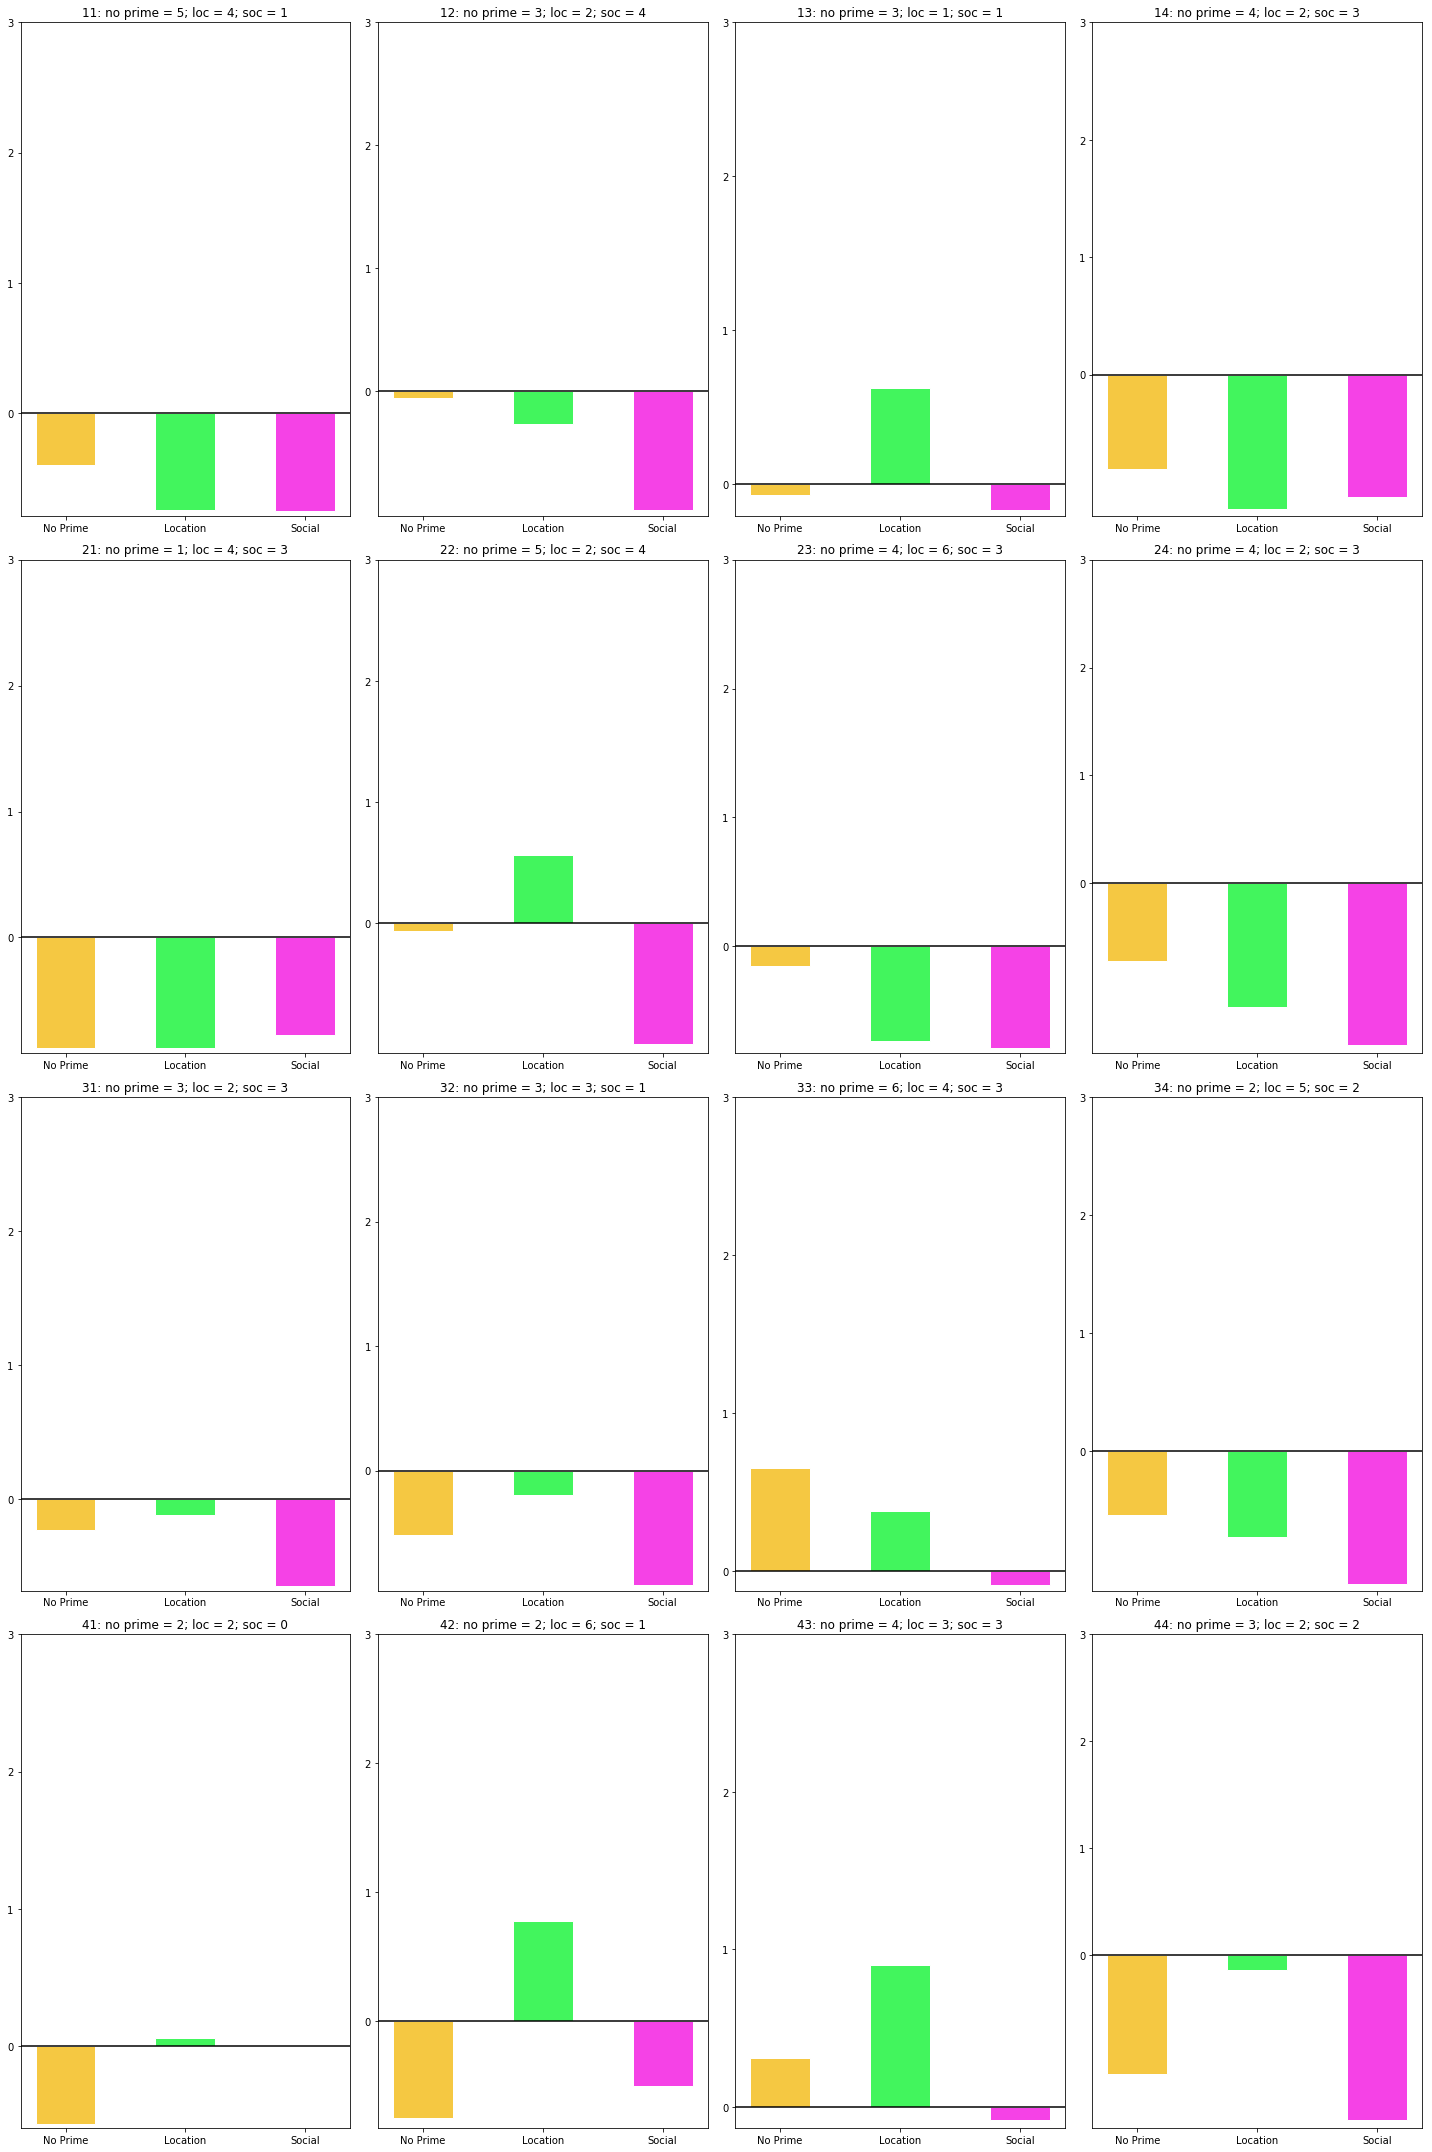

In [14]:
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 30))
# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[0, 1, 2, 3], xticklabels=['No Prime', 'Location', 'Social'],
        yticks=[0, 1, 2, 3])
# set width of bar
barWidth = 0.5
i = 0
j = 0
for key in avg_ss.keys():
    
    #location avg - social avg for each priming type
    dif_0 = avg_ss_0[key][0] - avg_ss_0[key][1]
    dif_1 = avg_ss_1[key][0] - avg_ss_1[key][1]
    dif_2 = avg_ss_2[key][0] - avg_ss_2[key][1]
    
    #set height of bar
    dif = np.array([dif_0, dif_1, dif_2])
    
    #nan to num
    dif = np.nan_to_num(dif)
    
    #get the number of participants in each group
    num_0 = str(len(ss_0[key]))
    num_1 = str(len(ss_1[key]))
    num_2 = str(len(ss_2[key]))
    title = str(key) + ": no prime = " + num_0 + "; loc = " + num_1 + "; soc = " + num_2
    
    # Set position of bar on X axis
    r1 = np.arange(len(dif))

    # Make the plot
    axes[j, i].bar(r1, dif, color=['#f5c842', '#42f55d', '#f542e6'] , width=barWidth, edgecolor='white')
    
    #set title
    axes[j, i].set_title(title)
    
    #drawing x axis
    axes[j, i].axhline(y=0, color = '#000000')
    
    # Add xticks on the middle of the group bars
    #axes[i, j].set_xlabel(key, fontweight='bold')
    axes[j, i].set_yticks([0, 1, 2, 3])
    
    
    #changing i, j for next graph placement
    if i == 3:
        i = 0
        j += 1
    else:
        i += 1
    figure.tight_layout()


## B. Averaging the differences in loc and soc scores across all stories

Text(0.5, 1.0, 'Avg dif of all stories: no prime = 54; loc = 50; soc = 37')

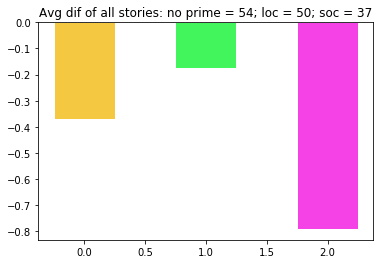

In [15]:
#iterating over all the stories

all_difs = np.zeros((16, 6))
count = 0

for key in avg_ss.keys():
    
    #finding difference between avg loc question score and avg soc question score
    dif_0 = avg_ss_0[key][0] - avg_ss_0[key][1]
    dif_1 = avg_ss_1[key][0] - avg_ss_1[key][1]
    dif_2 = avg_ss_2[key][0] - avg_ss_2[key][1]
    
    #getting the number of participants in each group
    num_0 = len(ss_0[key])
    num_1 = len(ss_1[key])
    num_2 = len(ss_2[key])
    
    #putting vals into array
    all_difs[count:] = np.array([dif_0, dif_1, dif_2, num_0, num_1, num_2])
    count += 1

#average column-wise to get average differences in loc-soc scores
avg_dif = np.nanmean(all_difs, axis = 0)

#sum column-wise to get sum of participants in each group 
sum_dif = np.sum(all_difs, axis = 0)
sum_0 = str(int(sum_dif[3]))
sum_1 = str(int(sum_dif[4]))
sum_2 = str(int(sum_dif[5]))

#plotting
# Set position of bars on X axis
r1 = np.arange(len(dif))
plt.bar(r1, avg_dif[0:3], color=['#f5c842', '#42f55d', '#f542e6'] , width=barWidth, edgecolor='white')
plt.title('Avg dif of all stories: no prime = ' +  sum_0 + '; loc = ' + sum_1 + "; soc = " + sum_2)

## C. Making a df of the loc and soc primed differences for each story to export as a csv

In [16]:
data = [{'loc_p': all_difs[:,1]}, {'soc_p': all_difs[:,2]}]
df = pd.DataFrame({'loc_p': all_difs[:,1],'soc_p': all_difs[:,2]})
df.to_csv('csv/dif_vals.csv', index=False)

# VI. Priming Effect: Difference between location and social difference of location primed and social primed participants
### - [loc(l) - soc(l)] - [loc(s) - soc(s)]
## A. For each story

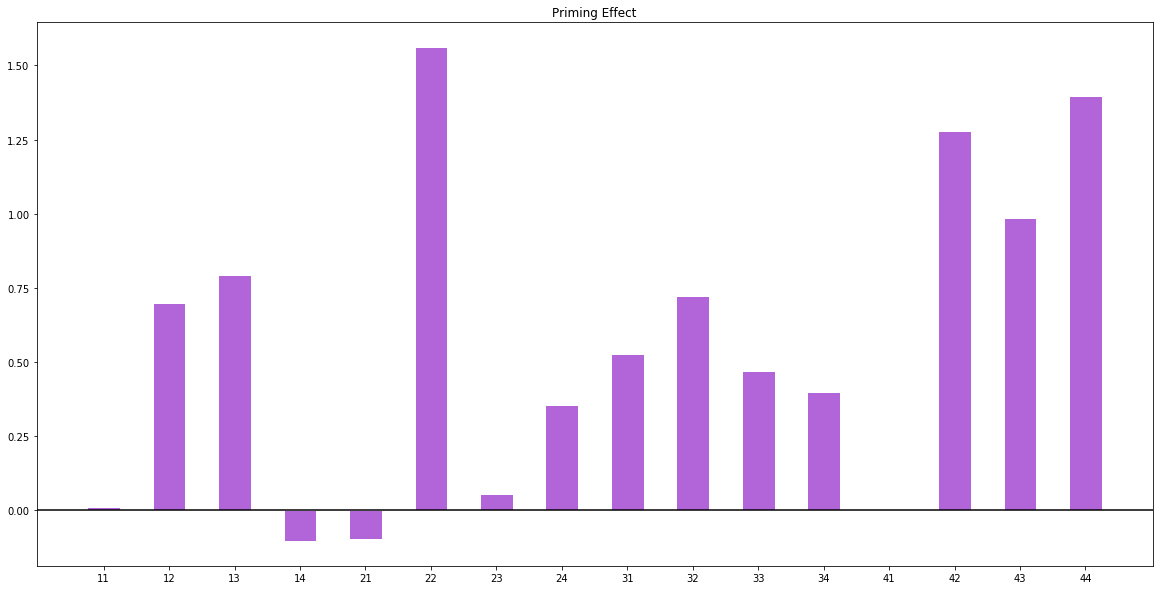

In [17]:
story_list = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']

# Initiating array for storing value for each story
priming_vals = np.zeros((16))
count = 0

for key in avg_ss.keys():
    
    #finding difference between avg loc question score and avg soc question score
    dif_1 = avg_ss_1[key][0] - avg_ss_1[key][1]
    dif_2 = avg_ss_2[key][0] - avg_ss_2[key][1]
    
    #difference of the difference
    val = dif_1 - dif_2
    
    #putting vals into array
    priming_vals[count] = val
    count += 1


#plotting
# Set position of bars on X axis
r1 = np.arange(16)

plt.figure(figsize=(20,10))

plot_vals = np.nan_to_num(priming_vals)
plt.bar(story_list, plot_vals, color= '#b264d9' , width=barWidth, edgecolor='white')
plt.title('Priming Effect')
#drawing x axis
plt.axhline(y=0, color = '#000000')

## B. Average Priming Effect

In [18]:
mean_pe = np.nanmean(priming_vals)
print(mean_pe)

0.6032870370370369
